### Exercise 02 : Bar
* analyze only the users and not the admins
* the fontsize and the figsize are still the same
* night is from 0:00:00 to 03:59:59, morning is from 04:00:00 to 09:59:59, afternoon
is from 10:00:00 to 16:59:59, evening is from 17:00:00 to 23:59:59
* choose a palette that you really enjoy, you do not have to replicate it from the graph
  above

In [6]:
import pandas as pd
import sqlite3

connection = sqlite3.connect("../data/checking-logs.sqlite")
query = "SELECT timestamp FROM checker WHERE uid LIKE 'user_%'"
df = pd.io.sql.read_sql(query, connection, parse_dates="timestamp")

bins=[-1, 4, 10, 17, 24]
labels=["night", "morning", "afternoon", "evening"]
df["daytime"] = pd.cut(df["timestamp"].dt.hour, bins=bins, labels=labels)
df["timestamp"] = df["timestamp"].dt.date
df.set_index("timestamp")
df = df.groupby(["timestamp", "daytime"], observed=False).size().reset_index(name="count")
df = df.pivot(index="timestamp", columns="daytime", values="count").fillna(0)
df

daytime,night,morning,afternoon,evening
timestamp,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,40,28
2020-04-19,2,11,9,11
2020-04-20,0,0,15,10
2020-04-21,0,0,9,16
2020-04-22,0,0,4,24
2020-04-23,2,6,15,20
2020-04-24,0,2,12,2
2020-04-25,1,21,48,34


<Axes: title={'center': 'Views per day'}, xlabel='timestamp'>

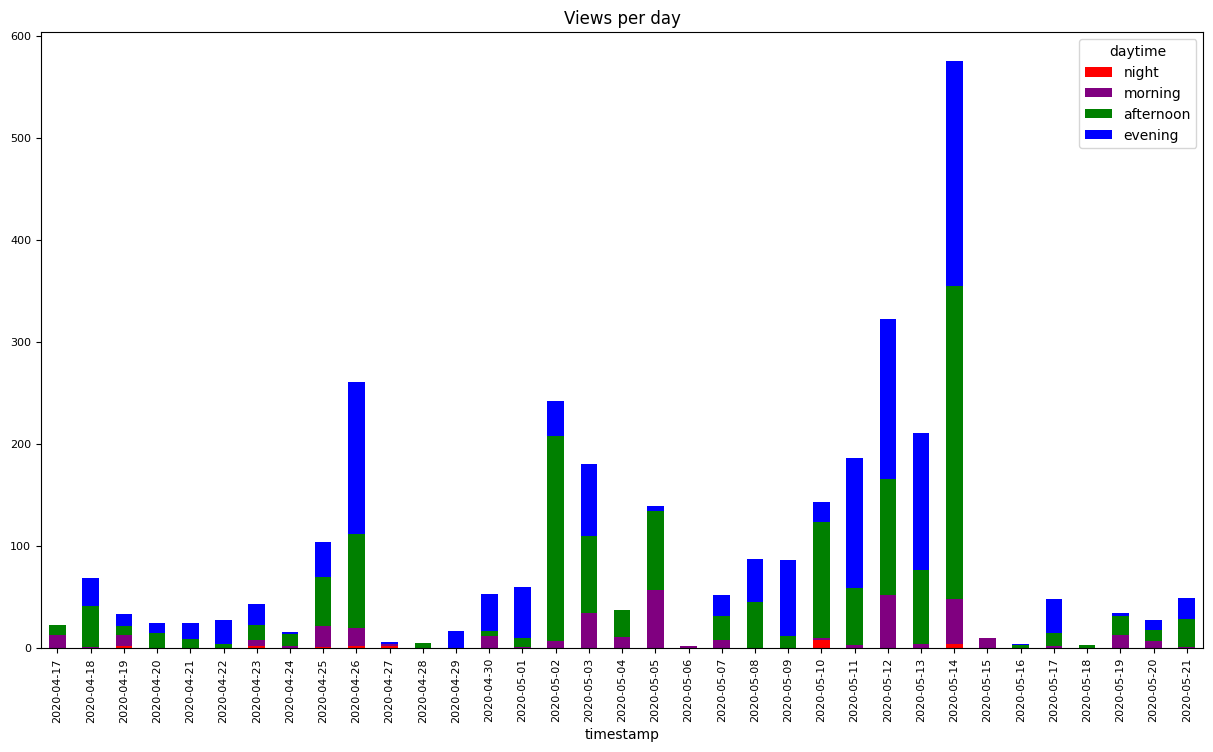

In [7]:
df.plot.bar(fontsize=8, figsize=(15, 8), title="Views per day", rot=90, stacked=True, color=["red", "purple", "green", "blue"])

* at the end of your Jupyter Notebook, create a markdown cell and insert the ques-
  tions:
  * “When do our users usually commit the labs: in the night, morning, afternoon,
  or evening?”, the answer is the two most common periods.
  * Which day has:
    * the most number of commits
    * and at the same time, the number of commits in the evening is higher than in the afternoon?

When do our users usually commit the labs: in the night, morning, afternoon, or evening?

In [8]:
answer = df.sum()
answer = answer.sort_values(ascending=False)
answer.head(2)

daytime
afternoon    1473
evening      1369
dtype: int64

Which day has:
* the most number of commits
* and at the same time, the number of commits in the evening is higher than in the afternoon?

In [9]:
str((df[df['evening'] > df['afternoon']]).sum(axis=1).idxmax())

'2020-05-12'

In [10]:
connection.close()